# Chiller plant decision tree analysis

The purpose of this notebook is to analyze the features and data with gradient boosting machines.

In [1]:
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import seaborn as sns
import glob
import os

# code to add to import from optichill folder
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from optichill import bas_filter

%matplotlib inline

C:\Users\Owner\Miniconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
print(glob.glob("../../Plt1/Plt1 m*"))

['../../Plt1\\Plt1 m 2016-11.csv', '../../Plt1\\Plt1 m 2016-12.csv', '../../Plt1\\Plt1 m 2017-01.csv', '../../Plt1\\Plt1 m 2017-02.csv', '../../Plt1\\Plt1 m 2017-03.csv', '../../Plt1\\Plt1 m 2017-04.csv', '../../Plt1\\Plt1 m 2017-05.csv', '../../Plt1\\Plt1 m 2017-06.csv', '../../Plt1\\Plt1 m 2017-07.csv', '../../Plt1\\Plt1 m 2017-08.csv', '../../Plt1\\Plt1 m 2017-09.csv', '../../Plt1\\Plt1 m 2017-10.csv', '../../Plt1\\Plt1 m 2017-11.csv', '../../Plt1\\Plt1 m 2017-12.csv', '../../Plt1\\Plt1 m 2018-01.csv', '../../Plt1\\Plt1 m 2018-02.csv', '../../Plt1\\Plt1 m 2018-03.csv', '../../Plt1\\Plt1 m 2018-04.csv']


In [3]:
new_files_list = []

all_minute_files_list = glob.glob("../../Plt1/Plt1 m*")
for element in all_minute_files_list:
    new_files_name = element.replace('../../Plt1\\', '')
    new_files_list.append(new_files_name)

print(new_files_list)

df = bas_filter.import_and_filter(
    '../../Plt1', new_files_list, '../../Plt1/Plt1 Points List.xlsx',
    include_alarms=False
)

['Plt1 m 2016-11.csv', 'Plt1 m 2016-12.csv', 'Plt1 m 2017-01.csv', 'Plt1 m 2017-02.csv', 'Plt1 m 2017-03.csv', 'Plt1 m 2017-04.csv', 'Plt1 m 2017-05.csv', 'Plt1 m 2017-06.csv', 'Plt1 m 2017-07.csv', 'Plt1 m 2017-08.csv', 'Plt1 m 2017-09.csv', 'Plt1 m 2017-10.csv', 'Plt1 m 2017-11.csv', 'Plt1 m 2017-12.csv', 'Plt1 m 2018-01.csv', 'Plt1 m 2018-02.csv', 'Plt1 m 2018-03.csv', 'Plt1 m 2018-04.csv']
['../../Plt1\\Plt1 m 2016-11.csv']
['../../Plt1\\Plt1 m 2016-12.csv']
['../../Plt1\\Plt1 m 2017-01.csv']
['../../Plt1\\Plt1 m 2017-02.csv']
['../../Plt1\\Plt1 m 2017-03.csv']
['../../Plt1\\Plt1 m 2017-04.csv']
['../../Plt1\\Plt1 m 2017-05.csv']
['../../Plt1\\Plt1 m 2017-06.csv']
['../../Plt1\\Plt1 m 2017-07.csv']
['../../Plt1\\Plt1 m 2017-08.csv']
['../../Plt1\\Plt1 m 2017-09.csv']
['../../Plt1\\Plt1 m 2017-10.csv']
['../../Plt1\\Plt1 m 2017-11.csv']
['../../Plt1\\Plt1 m 2017-12.csv']
['../../Plt1\\Plt1 m 2018-01.csv']
['../../Plt1\\Plt1 m 2018-02.csv']
['../../Plt1\\Plt1 m 2018-03.csv']
['../../

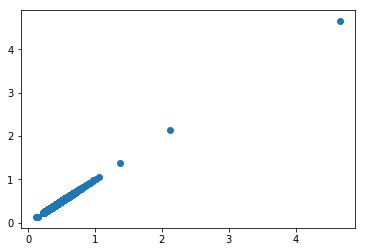

In [4]:
plt.scatter(df['kW/Ton'], df['kW/Ton'])
# plt.xlim(xmax=1.0)
# plt.xlim(xmin=0.2)
# plt.ylim(ymax=1.0)
# plt.ylim(ymin=0.2)

In [7]:
X = df.drop(['kW/Ton'], axis=1).values
Y = df['kW/Ton'].values

In [8]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.25,
                                               random_state=3393)

In [9]:
params = {'n_estimators': 500, 'max_depth': 6, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}

In [10]:
clf = GradientBoostingRegressor(**params)

In [11]:
clf.fit(xtrain, ytrain)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=6, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=500, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [12]:
y1 = clf.predict(xtest)

In [13]:
print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, y1))
print('Mean Squared Error:', metrics.mean_squared_error(ytest, y1))
print('Root Mean Squared Error:', np.sqrt(
    metrics.mean_squared_error(ytest, y1)))

Mean Absolute Error: 0.005736614995355446
Mean Squared Error: 9.516155782639169e-05
Root Mean Squared Error: 0.009755078565874889


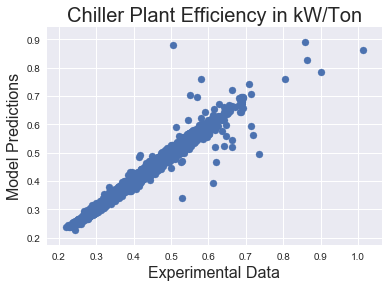

In [29]:
sns.set()
plt.figure()
plt.scatter(ytest, y1)
fs = 20
plt.title("Chiller Plant Efficiency in kW/Ton", fontsize=fs)
plt.xlabel("Experimental Data", fontsize=fs-4)
plt.ylabel("Model Predictions", fontsize=fs-4)
# plt.xlim(xmax=0.75)
# plt.ylim(ymax=0.75)
plt.savefig('r2_values_plt1.png', bbox_inches='tight')

In [30]:
test_score = r2_score(ytest, y1)
test_score

0.982727431247345

In [16]:
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

In [17]:
for i, ypred in enumerate(clf.staged_predict(xtest)):
    test_score[i] = clf.loss_(ytest, ypred)

Text(0,0.5,'Deviance')

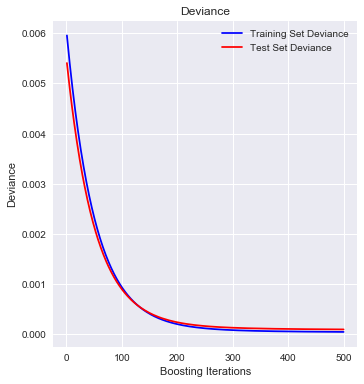

In [18]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

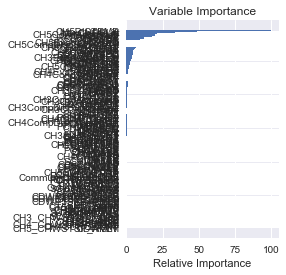

In [19]:
# Plot feature importance
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1,2,1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, df.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [20]:
x = df.columns[sorted_idx]

In [21]:
print(x)

Index(['CDWVLV', 'CH5_CHWSTSP_Alarm', 'CH4SURGECNT', 'CH4F', 'CH4ALARM',
       'CH4_CHWSTSP_Alarm', 'CH3SURGE', 'CH3SBoolean', 'CH5ALARM', 'CH3F',
       ...
       'CHWST', 'CH5FLA', 'CH5CHWST', 'CH4CHWSTSP', 'CT5HZ', 'CH5DPLift',
       'CH5CondApproach', 'MinCHDPLift', 'MaxCHDPLift', 'CH5DISTEMP'],
      dtype='object', length=192)


In [22]:
print(sorted_idx)

[  0 124 121 115  92  91  88  86 125  82  58  57  52  51  49  47  46  71
 139 140 150 189 185 182 180 178 177 175 173 171 169 165 163 159 156 155
 154 153  44  42 191  15  39   1  19  18  37  27  12  11  10  32 119  85
 157  41 176 118 126  70 132 105 138 190 183  56  87 184 187  34 104 167
 120  83 170  59  36 161  54 164  40 106  38  72  31  29  33  61  63 117
  89  16  81  77   5 122 127 162 110  35 113  28  94 107  60 101  99  96
  30  84  93  97  78 114  24  90  62  74 109 149  14  95  53 181  65  75
  25 111  68  17 160 179 102   4  73  26 116  76  64 134 100 168 130 131
   6  98  67  80 166 108   2 128 112   3 172 152 174 146 129  13  23 158
  43 137  50  21  79 188  66  55  48 141 148 135 123   8 133  69 142   9
 147  45   7 151 136 103 186 145 143  22  20 144]


In [23]:
print(feature_importance[sorted_idx])
imp = feature_importance[sorted_idx]

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 8.21250263e-06 1.24429551e-05 2.15200755e-05 3.09903599e-05
 1.26447556e-04 1.55292408e-04 2.39467203e-04 2.89195946e-04
 7.81210813e-04 1.44741820e-03 2.16177641e-03 4.40881251e-03
 6.24920008e-03 7.095162

In [24]:
df_feats = pd.DataFrame({'feature_name': x, 'feat_import': imp})

In [25]:
df_feats

,feat_import,feature_name
0,0.000000,CDWVLV
1,0.000000,CH5_CHWSTSP_Alarm
2,0.000000,CH4SURGECNT
3,0.000000,CH4F
4,0.000000,CH4ALARM
5,0.000000,CH4_CHWSTSP_Alarm
6,0.000000,CH3SURGE
7,0.000000,CH3SBoolean
8,0.000000,CH5ALARM
9,0.000000,CH3F


How does tree depth affect the r2 values?

In [31]:
pars = np.arange(2, 13, 2)
pars

array([ 2,  4,  6,  8, 10, 12])

In [ ]:
pars = np.arange(2, 15, 2)

scores = []
for n in pars:
    params1 = {'n_estimators': 450, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
    clf = GradientBoostingRegressor(**params1, max_depth=n)
    clf.fit(xtrain, ytrain)
    ypred = clf.predict(xtest)
    test_score = r2_score(ytest, ypred)
    scores.append(test_score)

sns.set()
plt.title("Effect of max_depth")
plt.xlabel("max_depth value")
plt.ylabel("r2_score")
plt.plot(pars, scores)


plt.savefig("max-depth-plot-plt1.png")

How does minimum sample split affect r2 values?

In [ ]:
pars = np.arange(2, 13, 2)

scores = []
for n in pars:
    params1 = {'n_estimators': 450, 'max_depth':4,
          'learning_rate': 0.01, 'loss': 'ls'}
    clf = GradientBoostingRegressor(**params1, min_samples_split=n)
    clf.fit(xtrain, ytrain)
    ypred = clf.predict(xtest)
    test_score = r2_score(ytest, ypred)
    scores.append(test_score)

sns.set()
plt.title("Effect of Minimum Sample Split")
plt.xlabel("min sample split")
plt.ylabel("r2_score")
plt.plot(pars, scores)

plt.savefig("min-sam-splt-plot-plt1.png")

How does the number of estimators affect r2 values?

In [ ]:
pars = np.arange(1, 1000, 50)

scores = []
for n in pars:
    params1 = {'max_depth':4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
    clf = GradientBoostingRegressor(**params1, n_estimators=n)
    clf.fit(xtrain, ytrain)
    ypred = clf.predict(xtest)
    test_score = r2_score(ytest, ypred)
    scores.append(test_score)

sns.set()
plt.title("Effect of Number of Estimators")
plt.xlabel("Number of Estimators")
plt.ylabel("r2_score")
plt.plot(pars, scores)


plt.savefig("num-est-plot-plt1.png")